In [1]:
 %matplotlib notebook
import pandas as pd
 import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats

In [2]:
output_data = pd.read_csv('Output Data Clean.csv')
output_data.head()
output_data['Population Density'] = output_data['Population']/output_data['Land Area']
output_data['Total Crime'] = output_data['Violent Crime'] + output_data['Property Crime']
output_data['Citizens per Officer'] = output_data['Population']/output_data['Total Officers']
output_data['Officer per Square Mile'] = output_data['Total Officers'] / output_data['Land Area']
output_data['Total Crime Rate'] = output_data['Total Crime'] / output_data['Population'] * 100000
output_data['Violent Crime Rate'] = output_data['Violent Crime'] / output_data['Population'] * 100000
output_data['Property Crime Rate'] = output_data['Property Crime'] / output_data['Population'] * 100000
output_data.sort_values(by='Violent Crime', ascending=False).head()
output_data = output_data.drop([21])
output_data = output_data.drop([36])
output_data.head()
output_data.sort_values(by='Total Officers', ascending=False).head()

,County,County Type,Violent Crime,Murder and Nonnegligent Manslaughter,Forcible Rape,Robbery,Aggravated Assault,Property Crime,Burglary,Larceny - Theft,...,Total Officers,Population,Land Area,Population Density,Total Crime,Citizens per Officer,Officer per Square Mile,Total Crime Rate,Violent Crime Rate,Property Crime Rate
8,Los Angeles,Metropolitan,49447,612,2046,21520,25269,229063,48534,137944,...,23991,9818605,4057,2420.163914,278510,409.262015,5.913483,2836.553665,503.605146,2332.948520
20,San Diego,Metropolitan,11571,66,662,3336,7507,66250,13909,39894,...,5087,3095313,4206,735.927960,77821,608.475133,1.209463,2514.156080,373.823261,2140.332819
14,Orange,Metropolitan,6876,67,446,2573,3790,59961,10806,43141,...,4694,3010232,790,3810.420253,66837,641.293566,5.941772,2220.327204,228.420932,1991.906272
16,Riverside,Metropolitan,6575,87,373,2145,3970,58526,16752,33620,...,3118,2189641,7206,303.863586,65101,702.258178,0.432695,2973.135779,300.277534,2672.858245
19,San Bernardino,Metropolitan,8368,104,483,2647,5134,54291,14463,31284,...,3010,2035210,20056,101.476366,62659,676.149502,0.150080,3078.748630,411.161502,2667.587129


In [3]:
total_officer = output_data.iloc[:, 17]

In [4]:
total_crime = output_data.iloc[:,18]

<IPython.core.display.Javascript object>


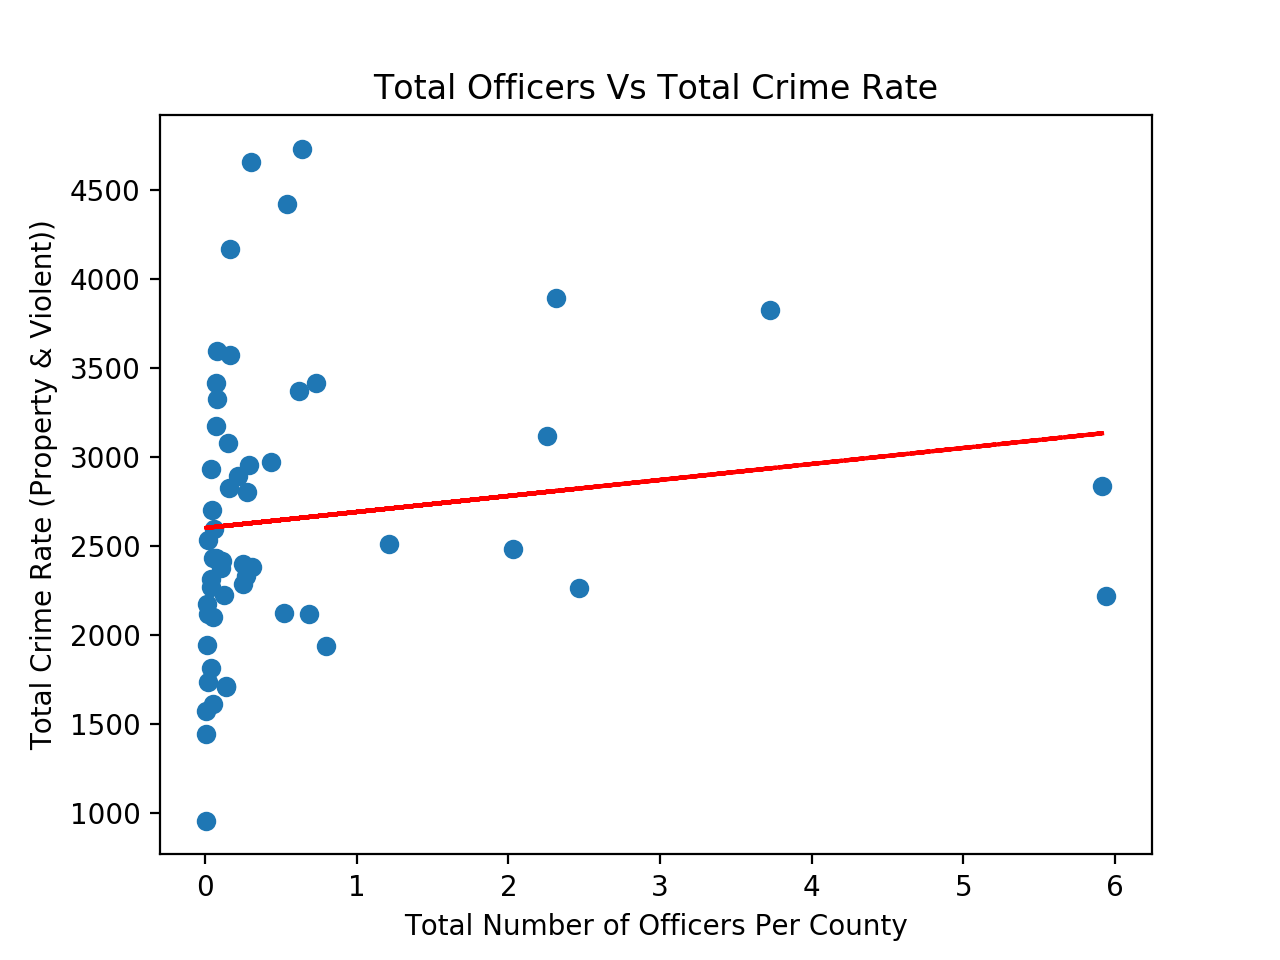

Text(0, 0.5, 'Total Crime Rate (Property & Violent))')

In [5]:
plt.scatter(total_officer, total_crime)

z = np.polyfit(total_officer, total_crime, 1)
p = np.poly1d(z)
plt.plot(total_officer,p(total_officer), 'r--')
plt.show()

plt.title("Total Officers Vs Total Crime Rate")
plt.xlabel("Total Number of Officers Per County")
plt.ylabel("Total Crime Rate (Property & Violent))")

In [6]:
np.corrcoef(total_officer, total_crime)

array([[1.        , 0.14158444],
       [0.14158444, 1.        ]])

In [7]:
plt.savefig("../Images/total officers vs total crime")